<a href="https://colab.research.google.com/github/Kuvedant/VisionIQ/blob/main/medical_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #!/usr/bin/env python3
# # Download the 56 zip files in Images_png in batches
# import urllib.request

# # URLs for the zip files
# links = [
#     'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
#     'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
#     'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
# 	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
#     'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
# 	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
# 	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
#     'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
# 	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
# 	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
# 	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
# 	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
# ]

# for idx, link in enumerate(links):
#     fn = 'images_%02d.tar.gz' % (idx+1)
#     print('downloading'+fn+'...')
#     urllib.request.urlretrieve(link, fn)  # download the zip file

# print("Download complete. Please check the checksums")

In [ ]:
import tarfile
import os

# # Path to the .tar.gz file and extraction directory
# tar_file = "images_01.tar.gz"
# extract_dir = "./extracted_images"

# # Ensure the extraction directory exists
# os.makedirs(extract_dir, exist_ok=True)

# # Extract the .tar.gz file
# with tarfile.open(tar_file, "r:gz") as tar:
#     tar.extractall(path=extract_dir)
#     print(f"Extracted {tar_file} to {extract_dir}")

Extracted files to /content/extracted_images
Number of images: 4999
Sample images: ['/content/extracted_images/images/00000032_053.png', '/content/extracted_images/images/00000830_000.png', '/content/extracted_images/images/00000988_001.png', '/content/extracted_images/images/00000061_012.png', '/content/extracted_images/images/00000429_000.png']


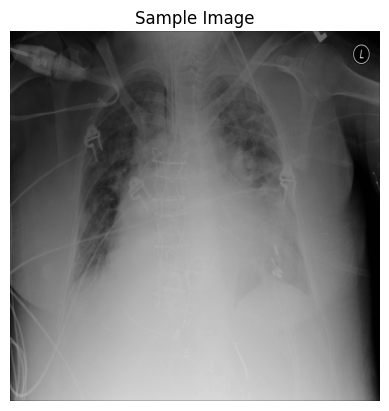

In [ ]:
import os
import tarfile
from PIL import Image
import matplotlib.pyplot as plt

# Path to the uploaded tar.gz file
tar_path = "/content/images_001.tar.gz"

# Directory to extract files
extract_dir = "/content/extracted_images"

# Extract the tar.gz file
if tarfile.is_tarfile(tar_path):
    with tarfile.open(tar_path, "r:gz") as tar:
        tar.extractall(path=extract_dir)
    print(f"Extracted files to {extract_dir}")
else:
    print("The uploaded file is not a valid tar.gz file.")
    raise ValueError("Invalid tar.gz file format")

# Walk through all directories and subdirectories to find files
image_files = []
for root, _, files in os.walk(extract_dir):
    for file in files:
        if file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff', '.gif')):  # Common image extensions
            image_files.append(os.path.join(root, file))

print(f"Number of images: {len(image_files)}")
print(f"Sample images: {image_files[:5]}")

# Display a sample image
if image_files:  # Ensure there are images in the directory
    sample_image_path = image_files[0]
    sample_image = Image.open(sample_image_path)
    plt.imshow(sample_image, cmap="gray")
    plt.axis('off')
    plt.title("Sample Image")
    plt.show()
else:
    print("No images found in the directory.")

In [ ]:
import pandas as pd

# Path to metadata file
metadata_path = "/content/Data_Entry_2017_v2020.csv"

# Load the metadata
data = pd.read_csv(metadata_path)
print(f"Metadata loaded successfully. Total entries: {len(data)}")


Metadata loaded successfully. Total entries: 112120


In [ ]:
import os

# Directory containing X-ray images
image_dir = "/content/extracted_images/images"

# Collect all image file paths
image_files = [
    os.path.join(image_dir, f) for f in os.listdir(image_dir)
    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))
]
print(f"Number of images: {len(image_files)}")

Number of images: 4999


### SAVE METADATA

In [ ]:
# Extract and normalize filenames from image_files
image_files = [os.path.basename(f).lower() for f in image_files]
data["Image Index"] = data["Image Index"].str.lower()

# Print samples for comparison
print("Sample from image_files:", image_files[:5])
print("Sample from Image Index column:", data["Image Index"].head())

Sample from image_files: ['00000032_053.png', '00000830_000.png', '00000988_001.png', '00000061_012.png', '00000429_000.png']
Sample from Image Index column: 0    00000001_000.png
1    00000001_001.png
2    00000001_002.png
3    00000002_000.png
4    00000003_001.png
Name: Image Index, dtype: object


In [ ]:
# Normalize filenames
data["Image Index"] = data["Image Index"].str.lower()
image_files = [f.lower() for f in image_files]

In [ ]:
matching_files = [f for f in image_files if f in data["Image Index"].values]
print(f"Number of matching files: {len(matching_files)}")
print("Sample of matching files:", matching_files[:5])

Number of matching files: 4999
Sample of matching files: ['00000032_053.png', '00000830_000.png', '00000988_001.png', '00000061_012.png', '00000429_000.png']


In [ ]:
# Filter metadata for matching files
filtered_data = data[data["Image Index"].isin(image_files)]
print(f"Number of matching entries in filtered metadata: {len(filtered_data)}")
print(filtered_data.head())

# Save filtered metadata to a CSV file
filtered_data.to_csv("/content/filtered_metadata.csv", index=False)
print("Filtered metadata saved to /content/filtered_metadata.csv")

Number of matching entries in filtered metadata: 4999
        Image Index          Finding Labels  Follow-up #  Patient ID  \
0  00000001_000.png            Cardiomegaly            0           1   
1  00000001_001.png  Cardiomegaly|Emphysema            1           1   
2  00000001_002.png   Cardiomegaly|Effusion            2           1   
3  00000002_000.png              No Finding            0           2   
4  00000003_001.png                  Hernia            0           3   

   Patient Age Patient Gender View Position  OriginalImage[Width  Height]  \
0           57              M            PA                 2682     2749   
1           58              M            PA                 2894     2729   
2           58              M            PA                 2500     2048   
3           80              M            PA                 2500     2048   
4           74              F            PA                 2500     2048   

   OriginalImagePixelSpacing[x     y]  
0         

Analyze dataset

In [ ]:
# Check unique labels
unique_labels = filtered_data["Finding Labels"].value_counts()
print("Unique Labels and Counts:")
print(unique_labels)

Unique Labels and Counts:
Finding Labels
No Finding                                    2754
Infiltration                                   417
Atelectasis                                    192
Effusion                                       156
Nodule                                         106
                                              ... 
Atelectasis|Effusion|Infiltration|Nodule         1
Consolidation|Edema|Effusion|Pneumothorax        1
Infiltration|Pneumonia|Pneumothorax              1
Cardiomegaly|Infiltration|Nodule|Pneumonia       1
Fibrosis|Pneumonia                               1
Name: count, Length: 209, dtype: int64


In [ ]:
# Split multi-label entries into individual labels
filtered_data["Simplified Labels"] = filtered_data["Finding Labels"].str.split("|").str[0]

# Check the distribution of simplified labels
label_counts = filtered_data["Simplified Labels"].value_counts()
print("Simplified Labels and Counts:")
print(label_counts)

Simplified Labels and Counts:
Simplified Labels
No Finding            2754
Infiltration           490
Atelectasis            460
Effusion               281
Cardiomegaly           173
Consolidation          160
Fibrosis               138
Nodule                 115
Emphysema               90
Pneumothorax            90
Mass                    81
Pleural_Thickening      66
Edema                   59
Hernia                  24
Pneumonia               18
Name: count, dtype: int64


<ipython-input-11-2ae4d0d3b10a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["Simplified Labels"] = filtered_data["Finding Labels"].str.split("|").str[0]


In [ ]:
# Select labels with at least 100 samples
filtered_labels = filtered_data["Simplified Labels"].value_counts()
selected_labels = filtered_labels[filtered_labels >= 100].index.tolist()

# Filter the dataset
filtered_data = filtered_data[filtered_data["Simplified Labels"].isin(selected_labels)]
print("Selected Labels and Counts:")
print(filtered_data["Simplified Labels"].value_counts())

Selected Labels and Counts:
Simplified Labels
No Finding       2754
Infiltration      490
Atelectasis       460
Effusion          281
Cardiomegaly      173
Consolidation     160
Fibrosis          138
Nodule            115
Name: count, dtype: int64


In [ ]:
# Separate majority and minority classes
no_finding = filtered_data[filtered_data["Simplified Labels"] == "No Finding"]
other_labels = filtered_data[filtered_data["Simplified Labels"] != "No Finding"]

# Downsample "No Finding"
no_finding_downsampled = no_finding.sample(n=len(other_labels), random_state=42)

# Combine the balanced dataset
balanced_data = pd.concat([no_finding_downsampled, other_labels])

print("Balanced Dataset Label Counts:")
print(balanced_data["Simplified Labels"].value_counts())

Balanced Dataset Label Counts:
Simplified Labels
No Finding       1817
Infiltration      490
Atelectasis       460
Effusion          281
Cardiomegaly      173
Consolidation     160
Fibrosis          138
Nodule            115
Name: count, dtype: int64


In [ ]:
# Separate the "No Finding" and other classes
no_finding = balanced_data[balanced_data["Simplified Labels"] == "No Finding"]
other_labels = balanced_data[balanced_data["Simplified Labels"] != "No Finding"]

# Determine the target count (match the second most frequent label)
target_count = other_labels["Simplified Labels"].value_counts().max()

# Downsample "No Finding"
no_finding_downsampled = no_finding.sample(n=target_count, random_state=42)

# Combine downsampled "No Finding" with other labels
reduced_data = pd.concat([no_finding_downsampled, other_labels])

# Check the new distribution
print("Reduced Dataset Label Counts:")
print(reduced_data["Simplified Labels"].value_counts())

Reduced Dataset Label Counts:
Simplified Labels
No Finding       490
Infiltration     490
Atelectasis      460
Effusion         281
Cardiomegaly     173
Consolidation    160
Fibrosis         138
Nodule           115
Name: count, dtype: int64


In [ ]:
!pip install segment-anything


In [ ]:
pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-df3hsnez
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-df3hsnez
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done


In [ ]:
pip install segment-anything torch

In [ ]:
import requests

# URL of the SAM checkpoint
url = "https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth"

# File path to save the checkpoint
output_path = "sam_vit_h_4b8939.pth"

# Download the file
print("Downloading SAM checkpoint...")
response = requests.get(url, stream=True)
with open(output_path, "wb") as file:
    for chunk in response.iter_content(chunk_size=8192):
        file.write(chunk)

print("Download completed! File saved to:", output_path)

Download completed! File saved to: sam_vit_h_4b8939.pth


In [ ]:
from segment_anything import SamPredictor, sam_model_registry

# Load SAM checkpoint
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


In [ ]:
predictor = SamPredictor(sam)

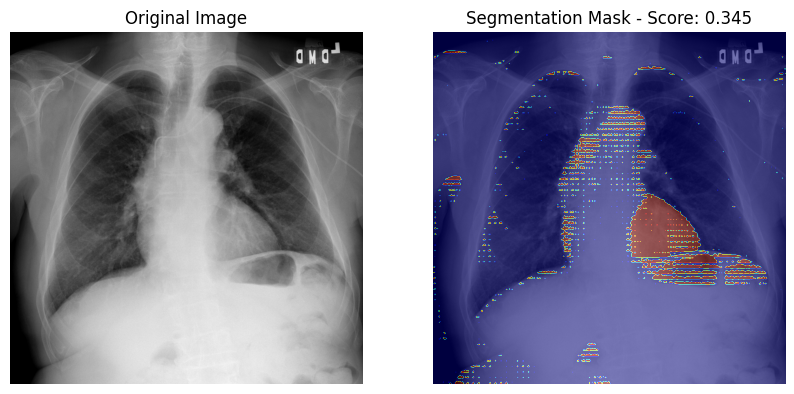

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Example image path (replace this with the path of the image you want to process)
image_path = "/content/extracted_images/images/00000039_003.png"  # Replace with your image path

# Load image
image = Image.open(image_path)

# Convert to RGB if necessary
if image.mode != 'RGB':
    image = image.convert('RGB')

# Preprocess image (convert to numpy array)
image_np = np.array(image)

# Set the image for SAM
predictor.set_image(image_np)

# Generate segmentation mask (multimask_output enables generation of multiple masks)
masks, scores, _ = predictor.predict(multimask_output=True)

# Display the segmentation result
plt.figure(figsize=(10, 10))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show segmentation mask (overlay)
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.imshow(masks[0], alpha=0.5, cmap="jet")  # Overlay the first mask
plt.title(f"Segmentation Mask - Score: {scores[0]:.3f}")
plt.axis("off")

plt.show()

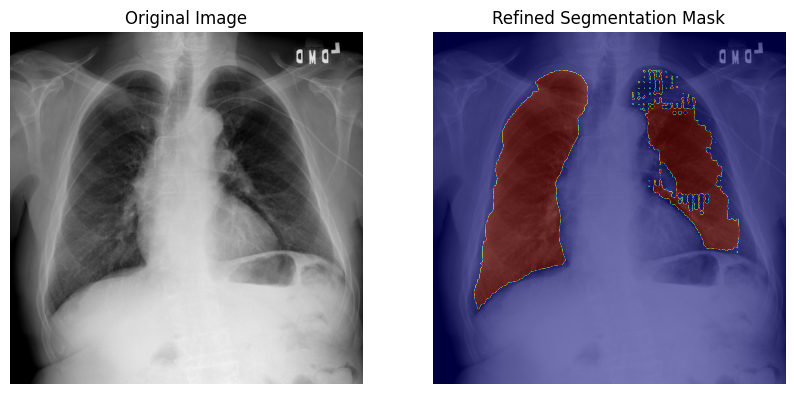

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

# Function to refine segmentation mask
def refine_mask(masks, confidence_threshold=0.4):
    refined_masks = []

    for mask, score in zip(masks, scores):
        if score < confidence_threshold:
            continue  # Skip masks with low confidence

        # Apply a simple thresholding to remove noisy areas
        mask = mask > 0.5  # Threshold the mask (considering values above 0.5 as part of the region)

        # Apply morphological operations to clean up mask (dilation followed by erosion)
        mask = morphology.dilation(mask, morphology.disk(5))  # Dilation to expand the region
        mask = morphology.erosion(mask, morphology.disk(5))  # Erosion to reduce the region back

        refined_masks.append(mask)

    return refined_masks

# Example: Refine the segmentation mask for one image
refined_masks = refine_mask(masks)

# Display the original image and refined mask
plt.figure(figsize=(10, 10))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show refined segmentation mask (overlay)
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.imshow(refined_masks[0], alpha=0.5, cmap="jet")  # Overlay the first refined mask
plt.title("Refined Segmentation Mask")
plt.axis("off")

plt.show()

Confidence Score: 0.3454180359840393
Confidence Score: 0.58385169506073
Confidence Score: 0.737159013748169


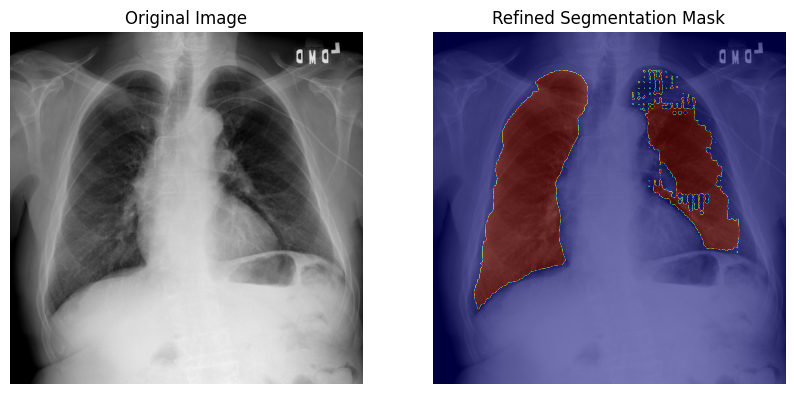

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

# Function to refine segmentation mask based on confidence score
def refine_mask(masks, scores, confidence_threshold=0.4):
    refined_masks = []

    for mask, score in zip(masks, scores):
        print(f"Confidence Score: {score}")  # Print the confidence score to inspect

        if score < confidence_threshold:
            continue  # Skip masks with low confidence

        # Apply a simple thresholding to remove noisy areas
        mask = mask > 0.5  # Threshold the mask (considering values above 0.5 as part of the region)

        # Apply morphological operations to clean up mask (dilation followed by erosion)
        mask = morphology.dilation(mask, morphology.disk(5))  # Dilation to expand the region
        mask = morphology.erosion(mask, morphology.disk(5))  # Erosion to reduce the region back

        refined_masks.append(mask)

    return refined_masks

# Example: Refine the segmentation mask for one image
# Assuming you have `masks` and `scores` from SAM (output from `predictor.predict()`)
masks, scores, _ = predictor.predict(multimask_output=True)  # Get masks and scores

# Refine the masks
refined_masks = refine_mask(masks, scores)

# Display the original image and refined mask
plt.figure(figsize=(10, 10))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show refined segmentation mask (overlay)
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.imshow(refined_masks[0], alpha=0.5, cmap="jet")  # Overlay the first refined mask
plt.title("Refined Segmentation Mask")
plt.axis("off")

plt.show()

Confidence Score: 0.3454180359840393
Confidence Score: 0.58385169506073
Confidence Score: 0.737159013748169


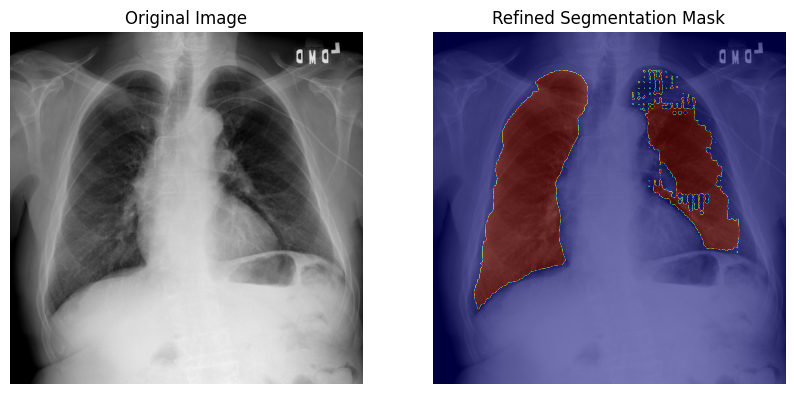

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import morphology

# Function to refine segmentation mask based on confidence score
def refine_mask(masks, scores, confidence_threshold=0.5):
    refined_masks = []

    for mask, score in zip(masks, scores):
        print(f"Confidence Score: {score}")  # Print the confidence score for each mask

        if score < confidence_threshold:
            continue  # Skip masks with low confidence

        # Apply a simple thresholding to remove noisy areas
        mask = mask > 0.5  # Threshold the mask (considering values above 0.5 as part of the region)

        # Apply morphological operations to clean up mask (dilation followed by erosion)
        mask = morphology.dilation(mask, morphology.disk(5))  # Dilation to expand the region
        mask = morphology.erosion(mask, morphology.disk(5))  # Erosion to reduce the region back

        refined_masks.append(mask)

    return refined_masks

# Example: Refine the segmentation mask for one image
# Assuming you have `masks` and `scores` from SAM
masks, scores, _ = predictor.predict(multimask_output=True)  # Get masks and scores

# Refine the masks based on confidence threshold
refined_masks = refine_mask(masks, scores)

# Display the original image and refined mask
plt.figure(figsize=(10, 10))

# Show the original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis("off")

# Show refined segmentation mask (overlay)
plt.subplot(1, 2, 2)
plt.imshow(image)
plt.imshow(refined_masks[0], alpha=0.5, cmap="jet")  # Overlay the first refined mask
plt.title("Refined Segmentation Mask")
plt.axis("off")

plt.show()

### segment generation and refining for all images(display5)

/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


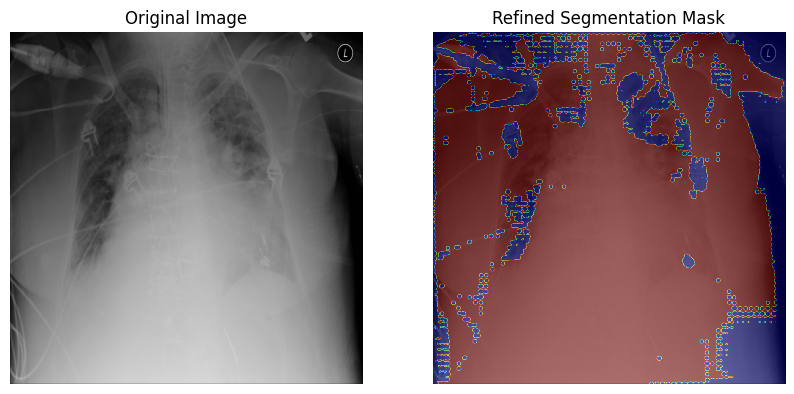

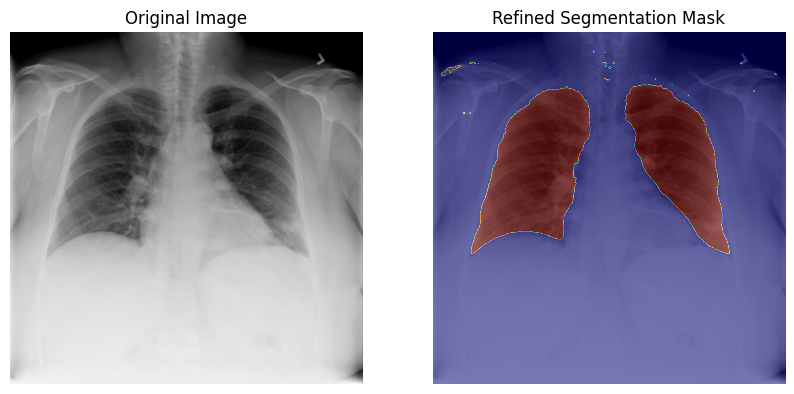

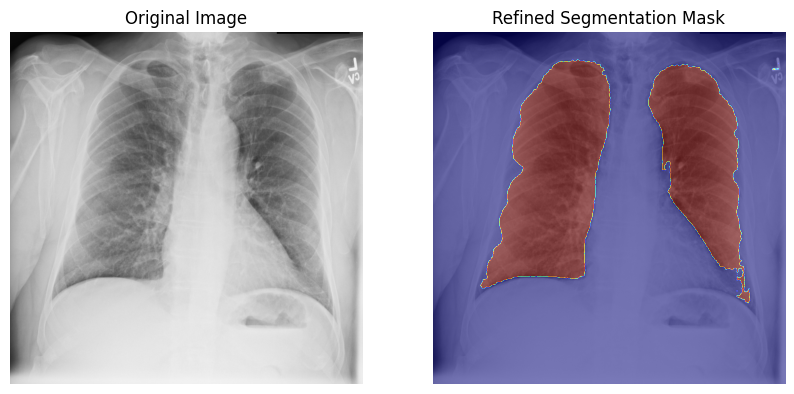

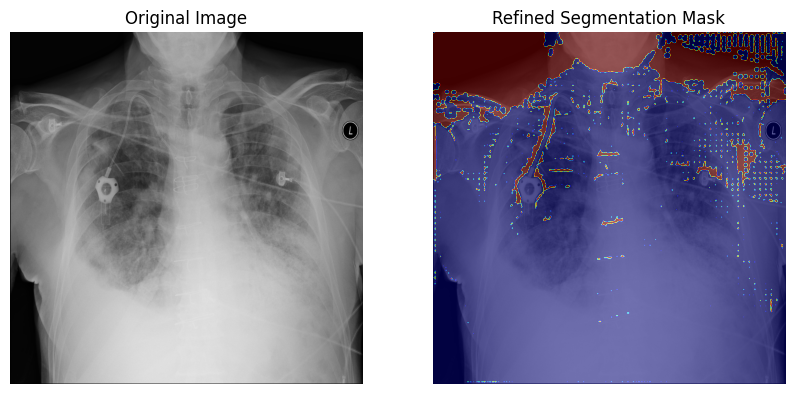

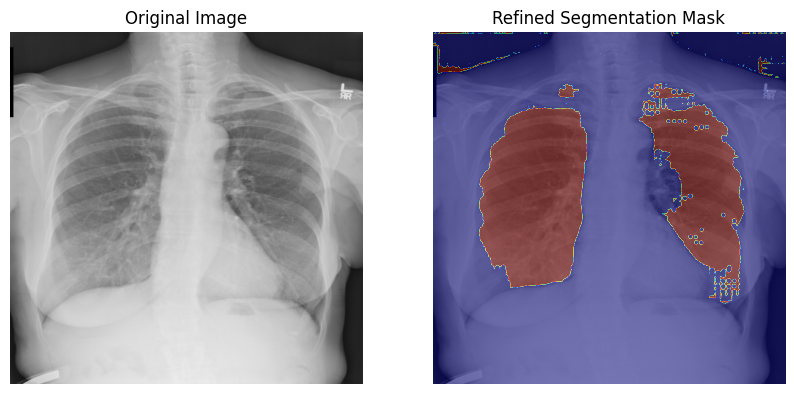

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from skimage import morphology
from segment_anything import SamPredictor

# Path to your images
image_dir = "/content/extracted_images/images"  # Path to your images

# Initialize SAM model
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
predictor = SamPredictor(sam)

# Function to generate segmentation mask and refine it
def generate_and_refine_mask(image_path, confidence_threshold=0.5):
    # Load the image
    image = Image.open(image_path)

    # Convert to RGB if necessary
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Preprocess image
    image_np = np.array(image)

    # Set the image for SAM
    predictor.set_image(image_np)

    # Generate segmentation mask
    masks, scores, _ = predictor.predict(multimask_output=True)

    refined_masks = []

    for mask, score in zip(masks, scores):
        if score < confidence_threshold:
            continue  # Skip low-confidence masks

        # Apply thresholding to remove noisy areas
        mask = mask > 0.5

        # Apply morphological operations to clean up mask (dilation followed by erosion)
        mask = morphology.dilation(mask, morphology.disk(5))  # Dilation to expand the region
        mask = morphology.erosion(mask, morphology.disk(5))  # Erosion to reduce the region back

        refined_masks.append(mask)

    return refined_masks, image

# Generate and refine masks for 5 images
refined_masks_list = []
image_paths = []
counter = 0

for image_name in os.listdir(image_dir):
    if counter == 5:  # Limit to 5 images
        break
    if image_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
        image_path = os.path.join(image_dir, image_name)
        refined_masks, image = generate_and_refine_mask(image_path)

        if refined_masks:
            refined_masks_list.append(refined_masks[0])  # Store the first refined mask
            image_paths.append(image_path)
            counter += 1

        # Display the original image and refined mask
        plt.figure(figsize=(10, 10))
        plt.subplot(1, 2, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(image)
        plt.imshow(refined_masks[0], alpha=0.5, cmap="jet")  # Overlay the refined mask
        plt.title(f"Refined Segmentation Mask")
        plt.axis("off")

        plt.show()

In [ ]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
import torch.nn.functional as F
from tqdm import tqdm
from skimage import io

# Define Dataset class for paired images and masks
class SegmentationDataset(Dataset):
    def __init__(self, image_paths, masks, transform=None):
        self.image_paths = image_paths
        self.masks = masks
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # Load image and mask
        image = io.imread(self.image_paths[idx])
        mask = self.masks[idx]  # Use the refined mask directly

        # Convert image and mask to PyTorch tensors
        image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)  # Add channel dimension
        mask = torch.tensor(mask, dtype=torch.float32).unsqueeze(0)  # Add channel dimension

        # Normalize if needed
        image = image / 255.0  # Example normalization

        return image, mask

# Define the Dice loss function for segmentation tasks
def dice_loss(pred, target):
    smooth = 1e-6
    intersection = torch.sum(pred * target)
    return 1 - (2. * intersection + smooth) / (torch.sum(pred) + torch.sum(target) + smooth)

# Prepare the image and mask paths for fine-tuning
image_dir = "/content/extracted_images/images"  # Path to your images
image_paths = []
refined_masks_list = []

# Assume refined masks are already generated, so we pair images with their masks
for image_path, refined_mask in zip(image_paths, refined_masks_list):
    # Add the paths and masks to the dataset
    image_paths.append(image_path)
    refined_masks_list.append(refined_mask)

# Define the DataLoader
train_dataset = SegmentationDataset(image_paths, refined_masks_list)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Initialize your pre-trained SAM model (or another suitable model)
sam_checkpoint = "sam_vit_h_4b8939.pth"
model_type = "vit_h"
sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)  # Adjust if needed
model = sam.cuda()  # Use GPU if available

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-5)

# Fine-Tuning Loop
num_epochs = 10
for epoch in tqdm(range(num_epochs)):
    model.train()
    running_loss = 0.0

    for inputs, masks in train_loader:
        inputs, masks = inputs.cuda(), masks.cuda()

        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Apply sigmoid for multi-class output (if needed)
        outputs = torch.sigmoid(outputs)

        # Calculate loss
        loss = dice_loss(outputs, masks)

        # Backward pass
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

# Save the fine-tuned model
torch.save(model.state_dict(), "fine_tuned_model.pth")


ValueError: num_samples should be a positive integer value, but got num_samples=0